<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#The-setup-/-header" data-toc-modified-id="The-setup-/-header-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>The setup / header</a></span></li><li><span><a href="#Introducing-pandas-objects" data-toc-modified-id="Introducing-pandas-objects-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Introducing pandas objects</a></span></li><li><span><a href="#Data-Indexing-and-Selection" data-toc-modified-id="Data-Indexing-and-Selection-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Indexing and Selection</a></span></li><li><span><a href="#Handling-Missing-Data" data-toc-modified-id="Handling-Missing-Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Handling Missing Data</a></span></li><li><span><a href="#Combining-datasets:-Concat-and-Append" data-toc-modified-id="Combining-datasets:-Concat-and-Append-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Combining datasets: Concat and Append</a></span></li><li><span><a href="#Combining-Dataset:-Merge-and-Join" data-toc-modified-id="Combining-Dataset:-Merge-and-Join-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Combining Dataset: Merge and Join</a></span></li><li><span><a href="#Aggregation-and-Grouping" data-toc-modified-id="Aggregation-and-Grouping-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Aggregation and Grouping</a></span></li><li><span><a href="#Graphics" data-toc-modified-id="Graphics-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Graphics</a></span></li><li><span><a href="#Regressions" data-toc-modified-id="Regressions-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Regressions</a></span></li><li><span><a href="#Operating-on-Data-in-Pandas" data-toc-modified-id="Operating-on-Data-in-Pandas-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Operating on Data in Pandas</a></span></li><li><span><a href="#Hierarchical-Indexing" data-toc-modified-id="Hierarchical-Indexing-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Hierarchical Indexing</a></span></li><li><span><a href="#Missing-topics" data-toc-modified-id="Missing-topics-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Missing topics</a></span></li></ul></div>

# The setup / header

In [1]:
# %matplotlib inline

import pandas as pd
import numpy as np

# Introducing pandas objects

**pandas Series**

Here is the link to the documentation: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html.

In [2]:
# Construct series
data = pd.Series([1, 2, 3, 4, 5])
data

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [3]:
# Access values
data.values

array([1, 2, 3, 4, 5], dtype=int64)

In [4]:
# Access index
data.index

RangeIndex(start=0, stop=5, step=1)

In [5]:
# Index by implicit integer index
data[1]

2

In [6]:
# Index by slices
data[1:3]

1    2
2    3
dtype: int64

In [7]:
# Create series with nonnumeric index
data = pd.Series([1, 2, 3, 4, 5], index=['a', 'b', 'c', 'd', 'e'])
data

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [8]:
# Index by explicit index
data['b']

2

**Series as specialized dictionary**

In [9]:
# Define dictionary
population_dict = {
    'California': 38332521,
    'Florida': 19552869,
    'Illinois': 12882135
}
# Populate series with dictionary
population = pd.Series(population_dict)
population

California    38332521
Florida       19552869
Illinois      12882135
dtype: int64

In [10]:
# Index by explicit index
population['California']

38332521

**pandas DataFrame**

In [11]:
# Define dictionary
area_dict = {
    'California': 423967,
    'Florida': 170312,
    'Illinois': 149995
}
# Populate second series with dictoinary
area = pd.Series(area_dict)
area

California    423967
Florida       170312
Illinois      149995
dtype: int64

In [12]:
# Define DataFrame as dictionary containing two series
states = pd.DataFrame({'population': population,
                       'area': area})
states

,area,population
California,423967,38332521
Florida,170312,19552869
Illinois,149995,12882135


In [13]:
# Access index
states.index

Index(['California', 'Florida', 'Illinois'], dtype='object')

In [14]:
# Access column names
states.columns

Index(['area', 'population'], dtype='object')

**DataFrame as specialized dictionary**

In [15]:
# Access column with explicit index
states['area']

California    423967
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [16]:
# Create DataFrame from one series
pd.DataFrame(population, columns=['population'])

,population
California,38332521
Florida,19552869
Illinois,12882135


# Data Indexing and Selection

In [17]:
data

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [18]:
data['b']

2

In [19]:
data['e'] = 6
data

a    1
b    2
c    3
d    4
e    6
dtype: int64

In [20]:
# slicing by explicit index
data['a':'c']

a    1
b    2
c    3
dtype: int64

In [21]:
# slicing by implicit index
data[0:2]

a    1
b    2
dtype: int64

In [22]:
# masking
data[(data < 2) | (data > 5)]

a    1
e    6
dtype: int64

In [23]:
# fancy indexing
data[['a', 'e']]

a    1
e    6
dtype: int64

**Indexers: loc and iloc**

In [24]:
# explicit and implicit indexing can have confusing implicatoins
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 7])
data

1    a
3    b
7    c
dtype: object

In [25]:
# Index by explicit index
data[1]

'a'

In [26]:
# Index by slice falls back to implicit index not explicit
data[1:3]

3    b
7    c
dtype: object

In [27]:
# loc always references the explicit index
data.loc[1]

'a'

In [28]:
data.loc[1:3]

1    a
3    b
dtype: object

In [29]:
# iloc always refereces the implicit index
data.iloc[1]

'b'

In [30]:
data.iloc[1:3]

3    b
7    c
dtype: object

In [31]:
# There exists a hybrid indexing method .ix and is equivalent to [] indexing,
# but since one the guiding principles of python is explicit is better than
# implicit, do not use it.

**Data Selection in DataFrame**

In [32]:
states

,area,population
California,423967,38332521
Florida,170312,19552869
Illinois,149995,12882135


In [33]:
states['area']

California    423967
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [34]:
# Columns of a DataFrame can also be accessed as an attribute with the . operator
states.area

California    423967
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [35]:
states['density'] = states['population'] / states['area']
states

,area,population,density
California,423967,38332521,90.413926
Florida,170312,19552869,114.806173
Illinois,149995,12882135,85.883763


**DataFrame as two-dimensional array**

In [36]:
states.values

array([[  4.23967000e+05,   3.83325210e+07,   9.04139261e+01],
       [  1.70312000e+05,   1.95528690e+07,   1.14806173e+02],
       [  1.49995000e+05,   1.28821350e+07,   8.58837628e+01]])

In [37]:
# Transpose DataFrame
states.T

,California,Florida,Illinois
area,4.239670e+05,1.703120e+05,1.499950e+05
population,3.833252e+07,1.955287e+07,1.288214e+07
density,9.041393e+01,1.148062e+02,8.588376e+01


In [38]:
# Passing single index yields column
states.values[0]

array([  4.23967000e+05,   3.83325210e+07,   9.04139261e+01])

In [39]:
states['area']

California    423967
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [40]:
states.iloc[1, :2]

area            170312.0
population    19552869.0
Name: Florida, dtype: float64

In [41]:
states.loc['Florida', :'population']

area            170312.0
population    19552869.0
Name: Florida, dtype: float64

In [42]:
states.loc[states.density < 100, ['population', 'area']]

,population,area
California,38332521,423967
Illinois,12882135,149995


In [43]:
states.iloc[1, 2] = 90
states

,area,population,density
California,423967,38332521,90.413926
Florida,170312,19552869,90.000000
Illinois,149995,12882135,85.883763


# Handling Missing Data

In [44]:
# Representation in python is np.nan or None

In [45]:
1 + np.nan

nan

In [46]:
0 * np.nan

nan

In [47]:
data = pd.Series([1, np.nan, 'hello', None])
data

0        1
1      NaN
2    hello
3     None
dtype: object

In [48]:
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [49]:
data[data.notnull()]

0        1
2    hello
dtype: object

In [50]:
data.dropna()

0        1
2    hello
dtype: object

In [51]:
df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,      6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [52]:
df.dropna()

,0,1,2
1,2.0,3.0,5


In [53]:
df.dropna(axis='columns')

,2
0,2
1,5
2,6


In [54]:
df.dropna(axis=0)

,0,1,2
1,2.0,3.0,5


In [55]:
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [56]:
df.dropna(axis='columns', how='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [57]:
df.dropna(axis='rows', thresh=3)

,0,1,2,3
1,2.0,3.0,5,NaN


**Filling null values**

In [58]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [59]:
data.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [60]:
data.fillna(method='ffill')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

# Combining datasets: Concat and Append

In [61]:
a = pd.DataFrame(np.random.randint(0, 10, (2, 2)), columns=list('AB'))
a

,A,B
0,7,3
1,6,1


In [62]:
b = pd.DataFrame(np.random.randint(0, 10, (3, 3)), columns=list('ABC'))
b

,A,B,C
0,7,0,1
1,2,9,9
2,1,7,5


In [63]:
# show pd.concat syntax
pd.concat([a, b])

,A,B,C
0,7,3,NaN
1,6,1,NaN
0,7,0,1.0
1,2,9,9.0
2,1,7,5.0


In [64]:
pd.concat([a, b], axis='columns')
# run a second time with verified integrity
# pd.concat([a, b], verify_integrity=True)

,A,B,A,B,C
0,7.0,3.0,7,0,1
1,6.0,1.0,2,9,9
2,NaN,NaN,1,7,5


In [65]:
pd.concat([a, b], ignore_index=True)

,A,B,C
0,7,3,NaN
1,6,1,NaN
2,7,0,1.0
3,2,9,9.0
4,1,7,5.0


In [66]:
# Different kinds of joins
pd.concat([a, b], join='inner')
pd.concat([a, b], join='outer')

,A,B,C
0,7,3,NaN
1,6,1,NaN
0,7,0,1.0
1,2,9,9.0
2,1,7,5.0


**The append method**

In [67]:
a.append(b)

,A,B,C
0,7,3,NaN
1,6,1,NaN
0,7,0,1.0
1,2,9,9.0
2,1,7,5.0


# Combining Dataset: Merge and Join

**One-to-one joins**

In [68]:
# First look at pd.merge interface
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
df1

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


In [69]:
df2

,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [70]:
# 1. automatic merge on identical columns
# 2. index is discarded
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


**Many-to-one joins**

In [71]:
df4 = pd.DataFrame({'employer_group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
df4

,employer_group,supervisor
0,Accounting,Carly
1,Engineering,Guido
2,HR,Steve


In [72]:
df5 = pd.merge(df3, df4, left_on='group', right_on='employer_group')
df5

,employee,group,hire_date,employer_group,supervisor
0,Bob,Accounting,2008,Accounting,Carly
1,Jake,Engineering,2012,Engineering,Guido
2,Lisa,Engineering,2004,Engineering,Guido
3,Sue,HR,2014,HR,Steve


In [73]:
df5 = df5.drop('employer_group', axis='columns')
df5

,employee,group,hire_date,supervisor
0,Bob,Accounting,2008,Carly
1,Jake,Engineering,2012,Guido
2,Lisa,Engineering,2004,Guido
3,Sue,HR,2014,Steve


**Many-to-many joins**

In [74]:
df6 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
df6

,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets
5,HR,organization


In [75]:
pd.merge(df1, df6)

,employee,group,skills
0,Bob,Accounting,math
1,Bob,Accounting,spreadsheets
2,Jake,Engineering,coding
3,Jake,Engineering,linux
4,Lisa,Engineering,coding
5,Lisa,Engineering,linux
6,Sue,HR,spreadsheets
7,Sue,HR,organization


**Set arithmetic for merges**

In [76]:
df6 = df6[df6.group != 'Accounting']
df6

,group,skills
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets
5,HR,organization


In [77]:
pd.merge(df1, df6, how='outer')

,employee,group,skills
0,Bob,Accounting,NaN
1,Jake,Engineering,coding
2,Jake,Engineering,linux
3,Lisa,Engineering,coding
4,Lisa,Engineering,linux
5,Sue,HR,spreadsheets
6,Sue,HR,organization


In [78]:
pd.merge(df1, df6, how='right')

,employee,group,skills
0,Jake,Engineering,coding
1,Lisa,Engineering,coding
2,Jake,Engineering,linux
3,Lisa,Engineering,linux
4,Sue,HR,spreadsheets
5,Sue,HR,organization


# Aggregation and Grouping

In [79]:
import seaborn as sns

planets = sns.load_dataset('planets')
planets.head(10)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009
5,Radial Velocity,1,185.840,4.80,76.39,2008
6,Radial Velocity,1,1773.400,4.64,18.15,2002
7,Radial Velocity,1,798.500,NaN,21.41,1996
8,Radial Velocity,1,993.300,10.30,73.10,2008
9,Radial Velocity,2,452.800,1.99,74.79,2010


In [80]:
planets.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [81]:
planets.max()

method            Transit Timing Variations
number                                    7
orbital_period                       730000
mass                                     25
distance                               8500
year                                   2014
dtype: object

In [82]:
planets.mass.mean()

2.6381605847953233

In [83]:
planets.method.unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

**Split-apply-combine**
![split-apply-combine](https://jakevdp.github.io/PythonDataScienceHandbook/figures/03.08-split-apply-combine.png)

In [84]:
planets.groupby('method').mean()

,number,orbital_period,mass,distance,year
method,,,,,
Astrometry,1.000000,631.180000,NaN,17.875000,2011.500000
Eclipse Timing Variations,1.666667,4751.644444,5.125000,315.360000,2010.000000
Imaging,1.315789,118247.737500,NaN,67.715937,2009.131579
Microlensing,1.173913,3153.571429,NaN,4144.000000,2009.782609
Orbital Brightness Modulation,1.666667,0.709307,NaN,1180.000000,2011.666667
Pulsar Timing,2.200000,7343.021201,NaN,1200.000000,1998.400000
Pulsation Timing Variations,1.000000,1170.000000,NaN,NaN,2007.000000
Radial Velocity,1.721519,823.354680,2.630699,51.600208,2007.518987
Transit,1.954660,21.102073,1.470000,599.298080,2011.236776


In [85]:
planets.groupby('method')['number'].mean()

method
Astrometry                       1.000000
Eclipse Timing Variations        1.666667
Imaging                          1.315789
Microlensing                     1.173913
Orbital Brightness Modulation    1.666667
Pulsar Timing                    2.200000
Pulsation Timing Variations      1.000000
Radial Velocity                  1.721519
Transit                          1.954660
Transit Timing Variations        2.250000
Name: number, dtype: float64

**Aggregation**

In [86]:
planets.groupby('method').agg(['min', np.median, max])

number            orbital_period                \
                                 min median max            min        median   
method                                                                         
Astrometry                         1      1   1     246.360000    631.180000   
Eclipse Timing Variations          1      2   2    1916.250000   4343.500000   
Imaging                            1      1   4    4639.150000  27500.000000   
Microlensing                       1      1   2    1825.000000   3300.000000   
Orbital Brightness Modulation      1      2   2       0.240104      0.342887   
Pulsar Timing                      1      3   3       0.090706     66.541900   
Pulsation Timing Variations        1      1   1    1170.000000   1170.000000   
Radial Velocity                    1      1   6       0.736540    360.200000   
Transit                            1      1   7       0.355000      5.714932   
Transit Timing Variations          2      2   3      22.339500     57.011000   

                                                mass               distance  \
                                         max     min median    max      min   
method                                                                        
Astrometry                       1016.000000     NaN    NaN    NaN    14.98   
Eclipse Timing Variations       10220.000000  4.2000  5.125   6.05   130.72   
Imaging                        730000.000000     NaN    NaN    NaN     7.69   
Microlensing                     5100.000000     NaN    NaN    NaN  1760.00   
Orbital Brightness Modulation       1.544929     NaN    NaN    NaN  1180.00   
Pulsar Timing                   36525.000000     NaN    NaN    NaN  1200.00   
Pulsation Timing Variations      1170.000000     NaN    NaN    NaN      NaN   
Radial Velocity                 17337.500000  0.0036  1.260  25.00     1.35   
Transit                           331.600590  1.4700  1.470   1.47    38.00   
Transit Timing Variations         160.000000     NaN    NaN    NaN   339.00   

                                                  year                
                                 median      max   min  median   max  
method                                                                
Astrometry                       17.875    20.77  2010  2011.5  2013  
Eclipse Timing Variations       315.360   500.00  2008  2010.0  2012  
Imaging                          40.395   165.00  2004  2009.0  2013  
Microlensing                   3840.000  7720.00  2004  2010.0  2013  
Orbital Brightness Modulation  1180.000  1180.00  2011  2011.0  2013  
Pulsar Timing                  1200.000  1200.00  1992  1994.0  2011  
Pulsation Timing Variations         NaN      NaN  2007  2007.0  2007  
Radial Velocity                  40.445   354.00  1989  2009.0  2014  
Transit                         341.000  8500.00  2002  2012.0  2014  
Transit Timing Variations       855.000  2119.00  2011  2012.5  2014

In [87]:
planets.groupby('method').agg({'number': min,
                          'mass': max})

,number,mass
method,,
Astrometry,1,NaN
Eclipse Timing Variations,1,6.05
Imaging,1,NaN
Microlensing,1,NaN
Orbital Brightness Modulation,1,NaN
Pulsar Timing,1,NaN
Pulsation Timing Variations,1,NaN
Radial Velocity,1,25.00
Transit,1,1.47


**Transformation**

In [88]:
planets.groupby('method')['mass'].mean()
# planets.groupby('method')['mass'].transform(np.mean)

method
Astrometry                            NaN
Eclipse Timing Variations        5.125000
Imaging                               NaN
Microlensing                          NaN
Orbital Brightness Modulation         NaN
Pulsar Timing                         NaN
Pulsation Timing Variations           NaN
Radial Velocity                  2.630699
Transit                          1.470000
Transit Timing Variations             NaN
Name: mass, dtype: float64

# Graphics

In [89]:
%matplotlib inline

import matplotlib.pyplot as plt

In [90]:
planets.groupby('method').number.count()

method
Astrometry                         2
Eclipse Timing Variations          9
Imaging                           38
Microlensing                      23
Orbital Brightness Modulation      3
Pulsar Timing                      5
Pulsation Timing Variations        1
Radial Velocity                  553
Transit                          397
Transit Timing Variations          4
Name: number, dtype: int64

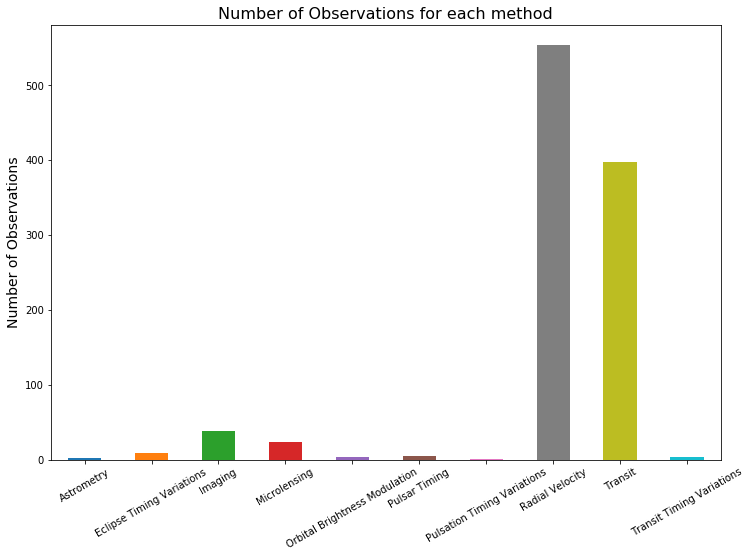

In [91]:
fig, ax = plt.subplots(figsize=(12, 8))

planets.groupby('method').number.count().plot(kind='bar', ax=ax, rot=30)

ax.set_title('Number of Observations for each method', fontsize=16)
ax.set_xlabel('')
ax.set_ylabel('Number of Observations', fontsize=14)

plt.show()
plt.close()

# Regressions

In [92]:
import statsmodels.formula.api as smf

In [93]:
results = smf.ols(formula='mass ~ C(method)', data=planets).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   mass   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.4709
Date:                Tue, 05 Dec 2017   Prob (F-statistic):              0.625
Time:                        11:35:02   Log-Likelihood:                -1414.3
No. Observations:                 513   AIC:                             2835.
Df Residuals:                     510   BIC:                             2847.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

C:\Users\tobia\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1471: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
C:\Users\tobia\Anaconda3\lib\site-packages\statsmodels\base\model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\tobia\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\tobia\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\tobia\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


# Operating on Data in Pandas

In [94]:
a = pd.DataFrame(np.random.randint(0, 10, (2, 2)), columns=list('AB'))
a

,A,B
0,9,6
1,0,2


In [95]:
b = pd.DataFrame(np.random.randint(0, 10, (3, 3)), columns=list('ABC'))
b

,A,B,C
0,6,9,1
1,2,0,5
2,8,7,0


In [96]:
a + b

,A,B,C
0,15.0,15.0,NaN
1,2.0,2.0,NaN
2,NaN,NaN,NaN


In [97]:
a.add(b, fill_value=0)

,A,B,C
0,15.0,15.0,1.0
1,2.0,2.0,5.0
2,8.0,7.0,0.0


In [98]:
# There are more functions like mul, sub, etc.
a.mul(b)

,A,B,C
0,54.0,54.0,NaN
1,0.0,0.0,NaN
2,NaN,NaN,NaN


# Hierarchical Indexing

In [99]:
index = pd.MultiIndex.from_product([['CA', 'NY', 'TX'],
                           [2000, 2010]], names=['state', 'year'])
pop = [33871648, 37253956, 18976457,
        19378102, 20851820, 25145561]

In [100]:
data = pd.Series(pop, index=index, name='population')

In [101]:
data.index.names

FrozenList(['state', 'year'])

**Indexing and Slicing a MultiIndex of a series**

In [102]:
data['CA']

year
2000    33871648
2010    37253956
Name: population, dtype: int64

In [103]:
data['CA', 2010]

37253956

In [104]:
data['CA':'TX']

state  year
CA     2000    33871648
       2010    37253956
NY     2000    18976457
       2010    19378102
TX     2000    20851820
       2010    25145561
Name: population, dtype: int64

**Indexing and Slicing a MultiIndex of a DataFrame**

In [105]:
under18 = [9267089, 9284094, 4687374, 4318033, 5906301, 6879014]
df = pd.DataFrame({'population': data, 'under18': under18})
df

population  under18
state year                     
CA    2000    33871648  9267089
      2010    37253956  9284094
NY    2000    18976457  4687374
      2010    19378102  4318033
TX    2000    20851820  5906301
      2010    25145561  6879014

In [106]:
df.population

state  year
CA     2000    33871648
       2010    37253956
NY     2000    18976457
       2010    19378102
TX     2000    20851820
       2010    25145561
Name: population, dtype: int64

In [107]:
df.loc[('CA', 2010)]

population    37253956
under18        9284094
Name: (CA, 2010), dtype: int64

In [108]:
# Unfortunately, slices are not allowed in tuples for this indexing method.
# Uncomment the next line to see the error. To use slices, look at the
# following cell.
# df.loc[('CA', :)]

In [109]:
idx = pd.IndexSlice
df.loc[idx['CA', :]]

,population,under18
year,,
2000,33871648,9267089
2010,37253956,9284094


**Stacking and unstacking indices**

In [110]:
data.unstack(level=0)

state,CA,NY,TX
year,,,
2000,33871648,18976457,20851820
2010,37253956,19378102,25145561


**Index setting and resetting**

In [111]:
df.reset_index('state')

,state,population,under18
year,,,
2000,CA,33871648,9267089
2010,CA,37253956,9284094
2000,NY,18976457,4687374
2010,NY,19378102,4318033
2000,TX,20851820,5906301
2010,TX,25145561,6879014


**Data Aggregation on Multi-Indices**

In [112]:
df.population.mean(level=0)

state
CA    35562802.0
NY    19177279.5
TX    22998690.5
Name: population, dtype: float64

# Missing topics

- [String operations](https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html): Pandas is great at working with text data since all operations are vectorized and fast.
- [Time Series](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html): Beautiful and intuitive api to work with time data.